# Object Localization with TensorFlow

Created for the Coursera Guided Project: [Object Localization with TensorFlow](https://www.coursera.org/projects/object-localization-tensorflow)

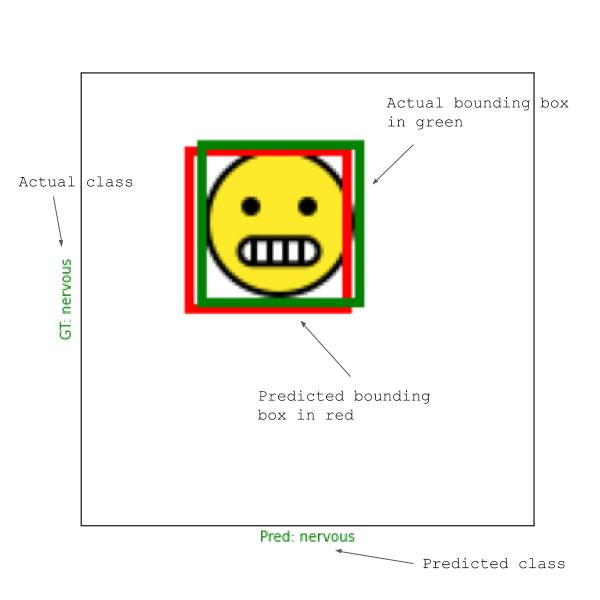

All emojis designed by [OpenMoji](https://openmoji.org/) – the open-source emoji and icon project. License: CC BY-SA 4.0

## Task 2: Download and Visualize Data

In [23]:
'''
!wget https://github.com/hfg-gmuend/openmoji/releases/latest/download/openmoji-72x72-color.zip
!mkdir emojis
!unzip -q openmoji-72x72-color.zip -d ./emojis
!pip install tensorflow==2.4
'''

'\n!wget https://github.com/hfg-gmuend/openmoji/releases/latest/download/openmoji-72x72-color.zip\n!mkdir emojis\n!unzip -q openmoji-72x72-color.zip -d ./emojis\n!pip install tensorflow==2.4\n'

In [24]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image, ImageDraw
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout

print('Check if we are using TensorFlow 2.4')
print('Using TensorFlow version', tf.__version__)

Check if we are using TensorFlow 2.4
Using TensorFlow version 2.4.0


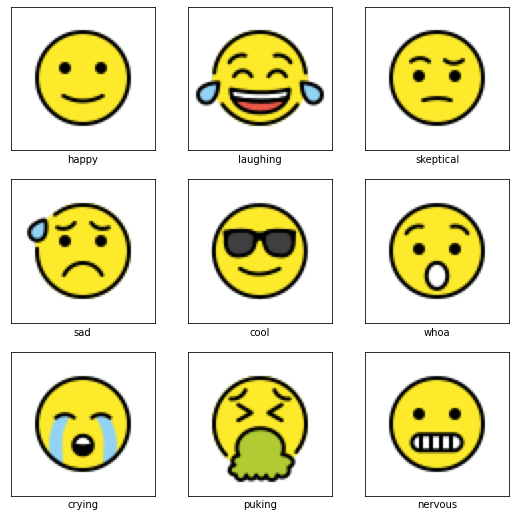

In [25]:
emojis = {
    0: {'name': 'happy', 'file': '1F642.png'},
    1: {'name': 'laughing', 'file': '1F602.png'},
    2: {'name': 'skeptical', 'file': '1F928.png'},
    3: {'name': 'sad', 'file': '1F630.png'},
    4: {'name': 'cool', 'file': '1F60E.png'},
    5: {'name': 'whoa', 'file': '1F62F.png'},
    6: {'name': 'crying', 'file': '1F62D.png'},
    7: {'name': 'puking', 'file': '1F92E.png'},
    8: {'name': 'nervous', 'file': '1F62C.png'}
}

plt.figure(figsize=(9, 9))

for i, (j, e) in enumerate(emojis.items()):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join('emojis', e['file'])))
    plt.xlabel(e['name'])
    plt.xticks([])
    plt.yticks([])
plt.show()

## Task 3: Create Examples

In [26]:
for class_id, values in emojis.items():
    png_file = Image.open(os.path.join('emojis', values['file'])).convert('RGBA')
    png_file.load()
    new_file = Image.new("RGB", png_file.size, (255, 255, 255))
    new_file.paste(png_file, mask=png_file.split()[3])
    emojis[class_id]['image'] = new_file

In [27]:
emojis

{0: {'name': 'happy',
  'file': '1F642.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA32E9750>},
 1: {'name': 'laughing',
  'file': '1F602.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA32EEA90>},
 2: {'name': 'skeptical',
  'file': '1F928.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA0777D90>},
 3: {'name': 'sad',
  'file': '1F630.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA32E9590>},
 4: {'name': 'cool',
  'file': '1F60E.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA0BA58D0>},
 5: {'name': 'whoa',
  'file': '1F62F.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA0BA5510>},
 6: {'name': 'crying',
  'file': '1F62D.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA0BA5110>},
 7: {'name': 'puking',
  'file': '1F92E.png',
  'image': <PIL.Image.Image image mode=RGB size=72x72 at 0x7FAEA0BA54D0>},
 8: {'name': 'nervous',
  'file': '

In [28]:
def createExample():
  # choose random class 0:9
  class_id = np.random.randint(0,9)
  # Create an 144*144*3 array call image
  image = np.ones( (144,144,3) ) * 255
  # choose random col and row 0:72
  row = np.random.randint(0,72)
  col = np.random.randint(0,72)
  # Add PIL value to "image" from random row to row+72 and from random col to col+72
  image[row: row+72, col : col+72, :] = np.array(emojis[class_id]['image'])
  #Return image as uint8, class_id, row, col
  return image.astype('uint8'), class_id, (row+10)/144, (col+10)/144


  

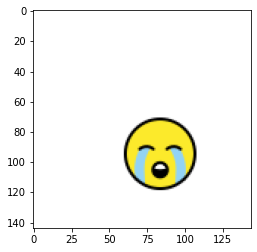

In [29]:
image, class_id, row, col = createExample()
plt.imshow(image);

## Task 4: Plot Bounding Boxes

In [30]:
def plot_bounding_box(image, gt_coords, pred_coords=[], norm=False):       #image, ground truth coordinates, prediction coordinates, normalization flag
  if norm:                                                                 #if normalization flag is True,(it means our image values are normalized)
    image *= 255.                                                             #then image values will be de-normalized
    image = image.astype('uint8')                                             #and it will become an unsigned integer as a type. So we can use the image
  image = Image.fromarray(image)                                           #with "fromarray", we can display the image
  draw = ImageDraw.Draw(image)                                             #for drawing the bounding box on the image

  row, col = gt_coords
  row *= 144                                                               #multiply by 144 for de-normalized
  col *= 144
  draw.rectangle((col, row, col + 52, row + 52), outline='green', width=3) #Draw a green rectangle on image with from row to row+52 and from col to col+52(ground truth)

  if len(pred_coords) == 2:                                                #If length of prediction coordinates are 2(row and col)
    row, col = pred_coords
    row *= 144
    col *= 144
    draw.rectangle((col, row, col + 52, row + 52), outline='red', width=3) #Draw a red rectangle on image with from row to row+52 and from col to col+52(prediction)
  return image

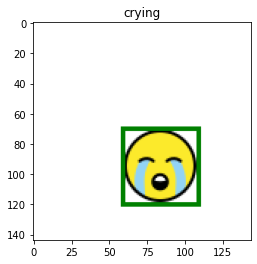

In [31]:
image = plot_bounding_box(image, gt_coords = [row, col])
plt.imshow(image)
plt.title(emojis[class_id]['name'])
plt.show()


## Task 5: Data Generator

In [32]:
def data_generator(batch_size = 16):
  while True:
    # create zeros array for images and classes
    x_batch = np.zeros( (batch_size, 144, 144, 3) )
    y_batch = np.zeros( (batch_size, 9) )
    #Create zeros fir array box (col , row)
    bbox_batch = np.zeros((batch_size,2))

    for i in range (0, batch_size):
      image, class_id, row, col = createExample()
      # Normalize Image
      x_batch[i] = image/255
      # putting 1 for the class_id, looks like [1,0,0,0,0,0,0,0,0]
      y_batch[i, class_id] = 1.0
      bbox_batch[i] = np.array([row, col])
    #yield is a keyword that is used like return, except the function will return a generator
    yield {'image': x_batch}, {'class_out': y_batch,'box_out': bbox_batch}



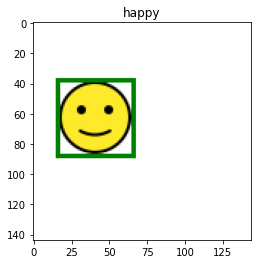

In [33]:
#Generate 1 example
example, label = next(data_generator(1))           
image = example['image'][0]
class_id = np.argmax(label['class_out'][0])
coords = label['box_out'][0]

image = plot_bounding_box(image, coords, norm=True)
plt.imshow(image)
plt.title(emojis[class_id]['name'])
plt.show()

## Task 6: Model

In [34]:
#Input layer, shape is the image shape
input_ = Input(shape=(144, 144, 3), name='image')              

x = input_

for i in range(0, 5):
  n_filters = 2**(4 + i)                                       
  x = Conv2D(n_filters, 3, activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
#Dense layer with 9 units for class
class_out = Dense(9, activation='softmax', name='class_out')(x)
#Dense layer with 2 units for bounding box(row, col)
box_out = Dense(2, name='box_out')(x)                          
#Build model
model = tf.keras.models.Model(input_, [class_out, box_out])    
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              [(None, 144, 144, 3) 0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 142, 142, 16) 448         image[0][0]                      
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 142, 142, 16) 64          conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 71, 71, 16)   0           batch_normalization_6[0][0]      
____________________________________________________________________________________________

## Task 7: Custom Metric: IoU

In [35]:
class IoU(tf.keras.metrics.Metric):                                        #Custom IoU class, inheritance of Metric class
  def __init__(self, **kwargs):
    super(IoU, self).__init__(**kwargs)                                    #super() allow us to use Metric class' arguments
    
    self.iou = self.add_weight(name='iou', initializer='zeros')            #add_weight: "Adds a new variable to the layer"
    self.total_iou = self.add_weight(name='total_iou', initializer='zeros')
    self.num_ex = self.add_weight(name='num_ex', initializer='zeros')
  
  def update_state(self, y_true, y_pred, sample_weight=None):
    def get_box(y):                                                        #a function for getting bounding box coordinates
      rows, cols = y[:, 0], y[:, 1]
      rows, cols = rows * 144, cols * 144
      y1, y2 = rows, rows + 52
      x1, x2 = cols, cols + 52
      return x1, y1, x2, y2
    
    def get_area(x1, y1, x2, y2):                                          #a function for getting area of bounding box
      return tf.math.abs(x2 - x1) * tf.math.abs(y2 - y1)
    
    gt_x1, gt_y1, gt_x2, gt_y2 = get_box(y_true)                           #getting ground truth bounding box coordinates
    p_x1, p_y1, p_x2, p_y2 = get_box(y_pred)                               #getting prediction bounding box coordinates

    i_x1 = tf.maximum(gt_x1, p_x1)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    i_y1 = tf.maximum(gt_y1, p_y1)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    i_x2 = tf.minimum(gt_x2, p_x2)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    i_y2 = tf.minimum(gt_y2, p_y2)                                         #return the maximum of gt_x1 and p_x1, assign to i_x1
    
    i_area = get_area(i_x1, i_y1, i_x2, i_y2)                              #area of intersection(or overlap)
    u_area = get_area(gt_x1, gt_y1, gt_x2, gt_y2) + get_area(p_x1, p_y1, p_x2, p_y2) - i_area #area of union

    iou = tf.math.divide(i_area, u_area)                                   #calculate the iou
    self.num_ex.assign_add(1)
    self.total_iou.assign_add(tf.reduce_mean(iou))                         #tf.reduce_mean():"Computes the mean of elements across dimensions of a tensor"
    self.iou = tf.math.divide(self.total_iou, self.num_ex)                 #total_iou divide by num_ex, then assign to iou
  
  def result(self):
    return self.iou                                                       
  
  def reset_state(self):                                                   #reseting the state
    self.iou = self.add_weight(name='iou', initializer='zeros')            
    self.total_iou = self.add_weight(name='total_iou', initializer='zeros')
    self.num_ex = self.add_weight(name='num_ex', initializer='zeros')

## Task 8: Compile the Model

In [36]:
model.compile(
    loss={
        'class_out': 'categorical_crossentropy',            #we have 2 outputs, one of which is class_out and we use "categorical_crossentropy" loss for it because class_out will be chosen from an array of 9 classes
        'box_out': 'mse'                                    #one of which is box_out, we use mse(mean squared error) loss for it because box_out return 2 numeric value(row and col)
    },
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics={
        'class_out': 'accuracy',                            #we use "accuracy" metric for class_out
        'box_out': IoU(name='iou')                          #and use our custom IoU class for box_out metric
    }
)

## Task 9: Custom Callback: Model Testing

In [37]:
def test_model(model, test_datagen):    #a function for test the model
  example, label = next(test_datagen)
  x = example['image']
  y = label['class_out']
  box = label['box_out']

  pred_y, pred_box = model.predict(x)

  pred_coords = pred_box[0]
  gt_coords = box[0]
  pred_class = np.argmax(pred_y[0])     #np.argmax: "Returns the indices of the maximum values along an axis"
  image = x[0]

  gt = emojis[np.argmax(y[0])]['name']           
  pred_class_name = emojis[pred_class]['name']

  image = plot_bounding_box(image, gt_coords, pred_coords, norm=True)
  color = 'green' if gt == pred_class_name else 'red'

  plt.imshow(image)
  plt.xlabel(f'Pred: {pred_class_name}', color=color)
  plt.ylabel(f'GT: {gt}', color=color)
  plt.xticks([])
  plt.yticks([])

In [38]:
def test(model):                   #a function for show the test result
  test_datagen = data_generator(1)

  plt.figure(figsize=(16, 4))

  for i in range(0, 6):
    plt.subplot(1, 6, i + 1)
    test_model(model, test_datagen)
  plt.show()

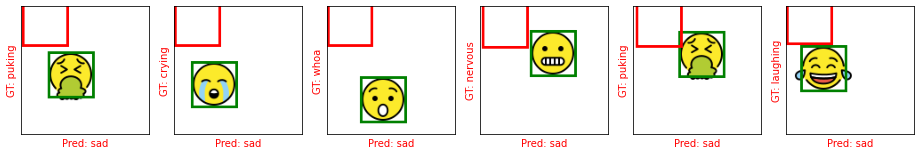

In [39]:
test(model)


In [41]:
class ShowTestImages(tf.keras.callbacks.Callback): #a custom callback to show the results of the model at the end of each epoch
  def on_epoch_end(self, epoch, logs=None):
    test(self.model)


## Task 10: Model Training

Epoch 1/50
500/500 [==============================] - 11s 18ms/step - loss: 2.7847 - class_out_loss: 1.4864 - box_out_loss: 1.2983 - class_out_accuracy: 0.4855 - box_out_iou: 0.5530


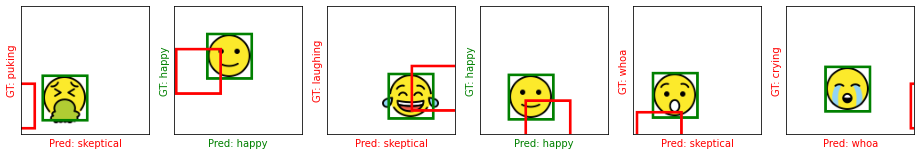

Epoch 2/50
500/500 [==============================] - 9s 19ms/step - loss: 0.0578 - class_out_loss: 0.0171 - box_out_loss: 0.0407 - class_out_accuracy: 0.9990 - box_out_iou: 0.2631


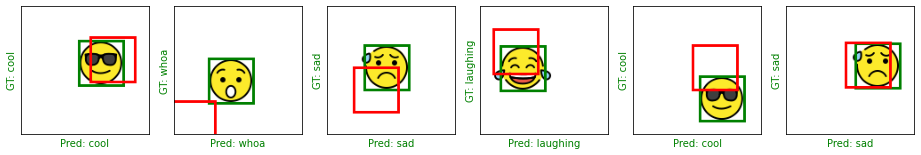

Epoch 3/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0283 - class_out_loss: 0.0101 - box_out_loss: 0.0183 - class_out_accuracy: 0.9982 - box_out_iou: 0.3705


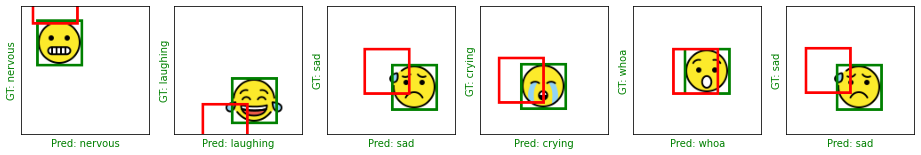

Epoch 4/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0160 - class_out_loss: 0.0039 - box_out_loss: 0.0121 - class_out_accuracy: 0.9995 - box_out_iou: 0.4452


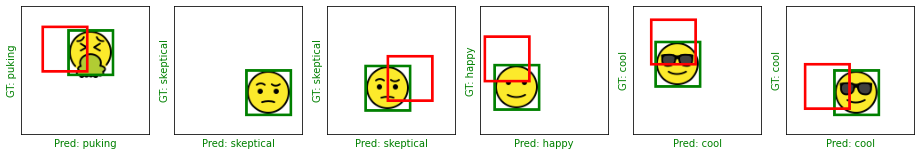

Epoch 5/50
500/500 [==============================] - 9s 19ms/step - loss: 0.0074 - class_out_loss: 0.0028 - box_out_loss: 0.0046 - class_out_accuracy: 0.9989 - box_out_iou: 0.5937


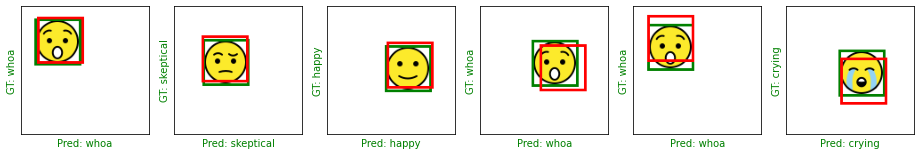

Epoch 6/50
500/500 [==============================] - 9s 19ms/step - loss: 0.0036 - class_out_loss: 7.0844e-04 - box_out_loss: 0.0029 - class_out_accuracy: 1.0000 - box_out_iou: 0.6492


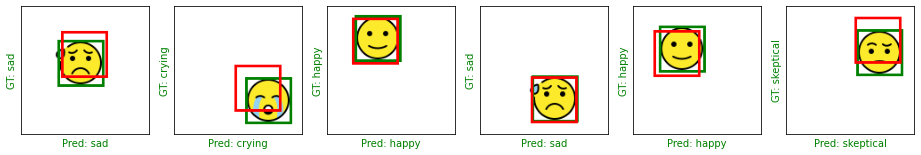

Epoch 7/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0031 - class_out_loss: 5.1869e-04 - box_out_loss: 0.0026 - class_out_accuracy: 1.0000 - box_out_iou: 0.6668


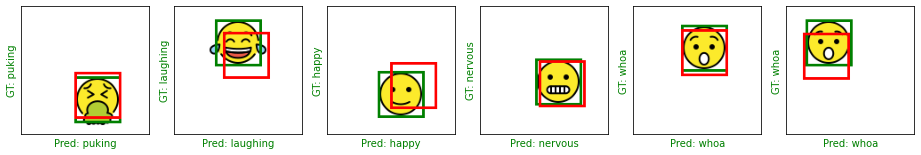

Epoch 8/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0026 - class_out_loss: 4.6439e-04 - box_out_loss: 0.0022 - class_out_accuracy: 1.0000 - box_out_iou: 0.6901


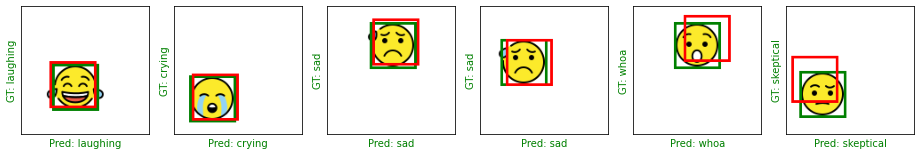

Epoch 9/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0025 - class_out_loss: 3.7852e-04 - box_out_loss: 0.0021 - class_out_accuracy: 1.0000 - box_out_iou: 0.6955


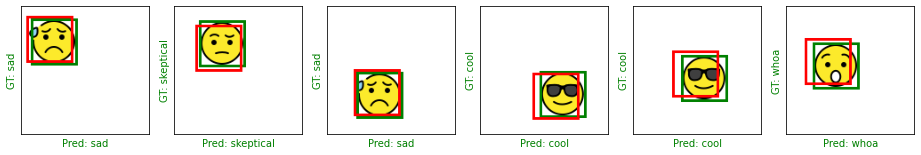

Epoch 10/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0019 - class_out_loss: 2.8466e-04 - box_out_loss: 0.0016 - class_out_accuracy: 1.0000 - box_out_iou: 0.7237


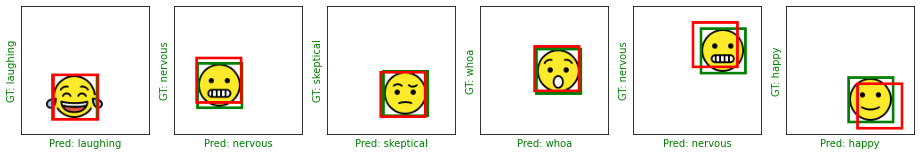

Epoch 11/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0017 - class_out_loss: 2.6689e-04 - box_out_loss: 0.0014 - class_out_accuracy: 1.0000 - box_out_iou: 0.7374


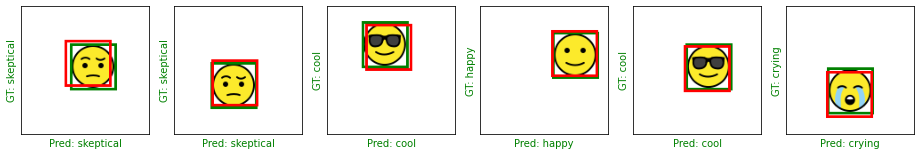

Epoch 12/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0017 - class_out_loss: 3.2592e-04 - box_out_loss: 0.0014 - class_out_accuracy: 1.0000 - box_out_iou: 0.7382


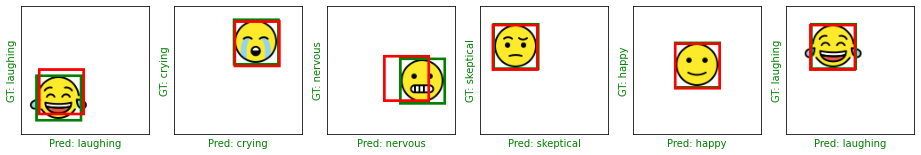

Epoch 13/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0018 - class_out_loss: 3.7162e-04 - box_out_loss: 0.0014 - class_out_accuracy: 1.0000 - box_out_iou: 0.7401


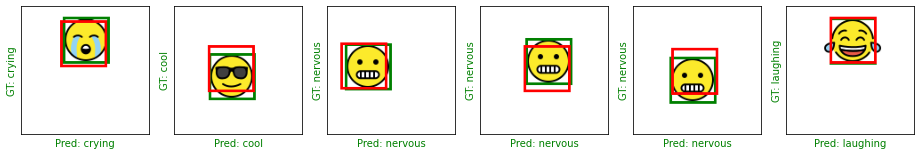

Epoch 14/50
500/500 [==============================] - 9s 18ms/step - loss: 0.0015 - class_out_loss: 2.7002e-04 - box_out_loss: 0.0012 - class_out_accuracy: 1.0000 - box_out_iou: 0.7516


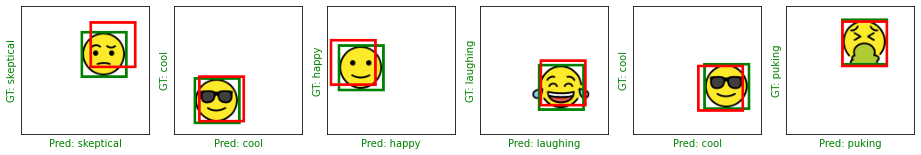

Epoch 15/50
500/500 [==============================] - 9s 19ms/step - loss: 0.0015 - class_out_loss: 3.5796e-04 - box_out_loss: 0.0012 - class_out_accuracy: 1.0000 - box_out_iou: 0.7559


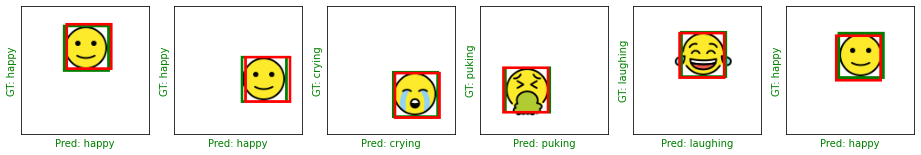

Epoch 16/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0014 - class_out_loss: 2.8660e-04 - box_out_loss: 0.0011 - class_out_accuracy: 1.0000 - box_out_iou: 0.7626


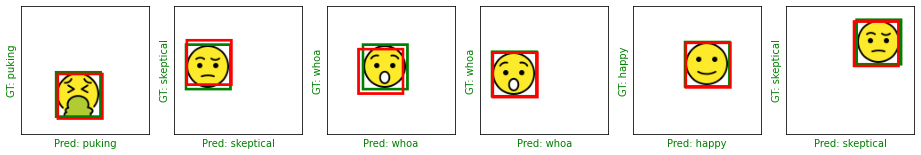

Epoch 17/50
500/500 [==============================] - 10s 21ms/step - loss: 0.0013 - class_out_loss: 2.2445e-04 - box_out_loss: 0.0011 - class_out_accuracy: 1.0000 - box_out_iou: 0.7674


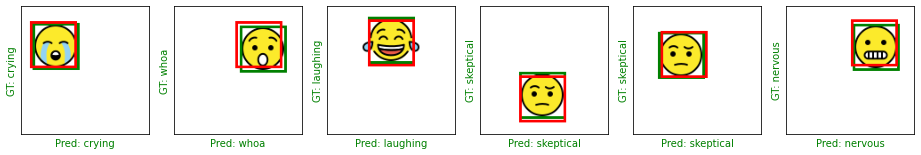

Epoch 18/50
500/500 [==============================] - 9s 19ms/step - loss: 0.0013 - class_out_loss: 2.3223e-04 - box_out_loss: 0.0011 - class_out_accuracy: 1.0000 - box_out_iou: 0.7682


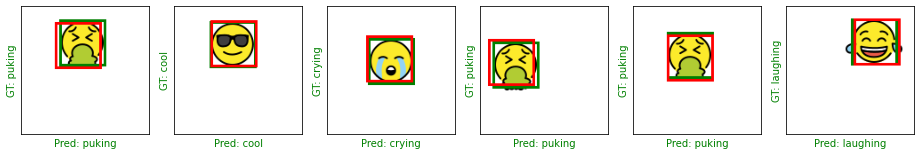

Epoch 19/50
500/500 [==============================] - 9s 19ms/step - loss: 0.0013 - class_out_loss: 2.2261e-04 - box_out_loss: 0.0011 - class_out_accuracy: 1.0000 - box_out_iou: 0.7641


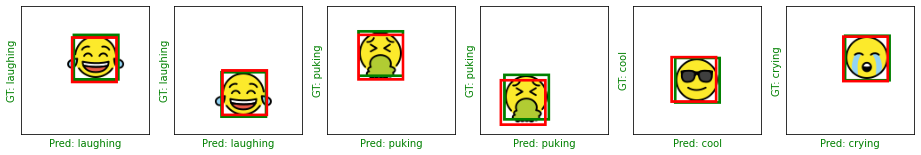

Epoch 20/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0013 - class_out_loss: 2.7167e-04 - box_out_loss: 0.0010 - class_out_accuracy: 1.0000 - box_out_iou: 0.7710


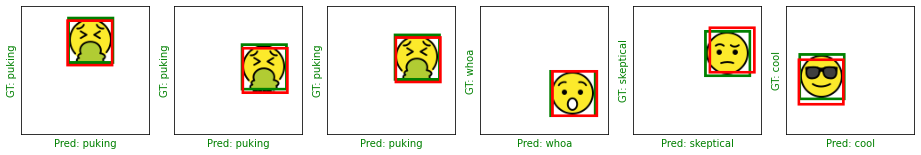

Epoch 21/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0012 - class_out_loss: 2.0717e-04 - box_out_loss: 9.9058e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7728


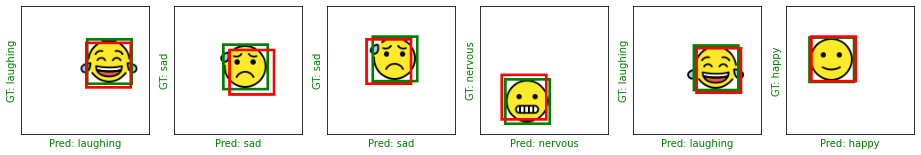

Epoch 22/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0012 - class_out_loss: 2.1710e-04 - box_out_loss: 0.0010 - class_out_accuracy: 1.0000 - box_out_iou: 0.7700


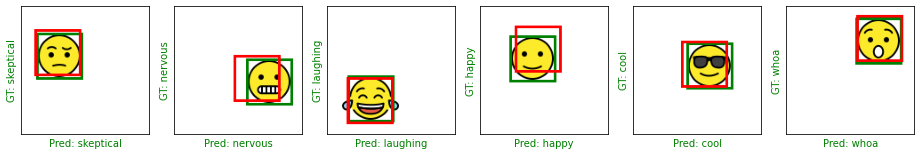

Epoch 23/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0012 - class_out_loss: 2.0001e-04 - box_out_loss: 9.9252e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7729


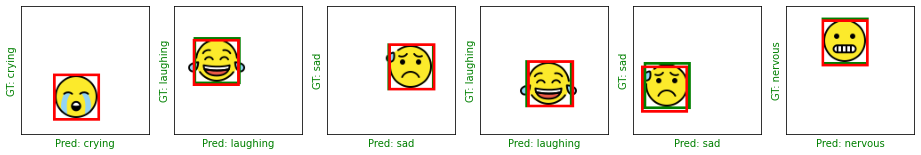

Epoch 24/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0012 - class_out_loss: 2.2883e-04 - box_out_loss: 9.9213e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7745


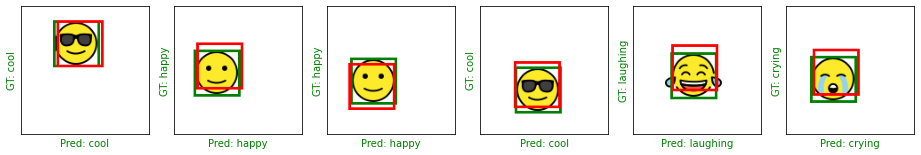

Epoch 25/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0012 - class_out_loss: 2.1500e-04 - box_out_loss: 9.6742e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7759


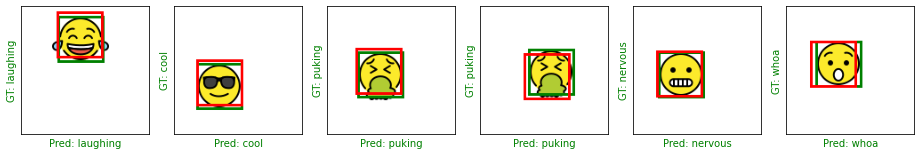

Epoch 26/50
500/500 [==============================] - 10s 19ms/step - loss: 0.0012 - class_out_loss: 2.2185e-04 - box_out_loss: 9.4214e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7773


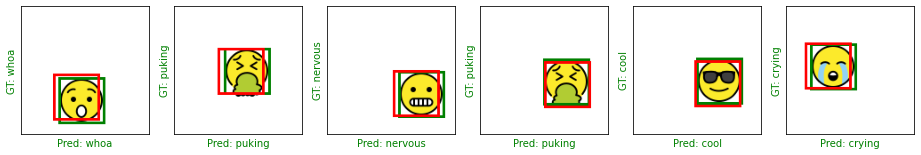

Epoch 27/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0011 - class_out_loss: 1.9100e-04 - box_out_loss: 9.4734e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7783


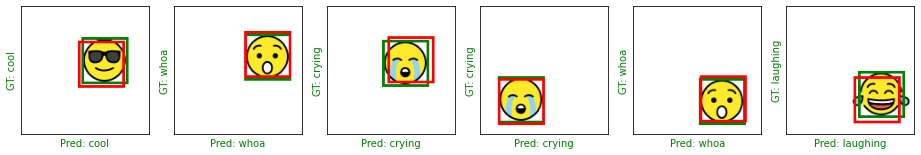

Epoch 28/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0011 - class_out_loss: 1.9769e-04 - box_out_loss: 9.4297e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7787


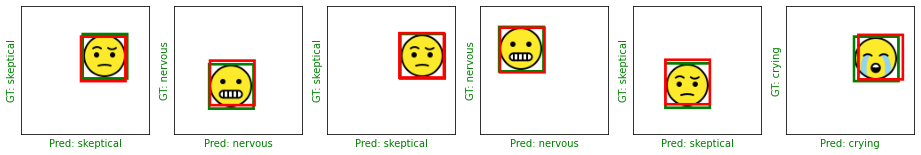

Epoch 29/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0011 - class_out_loss: 1.9372e-04 - box_out_loss: 9.4355e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7774


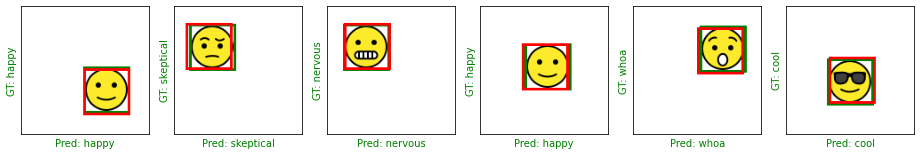

Epoch 30/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0012 - class_out_loss: 2.3848e-04 - box_out_loss: 9.7584e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7739


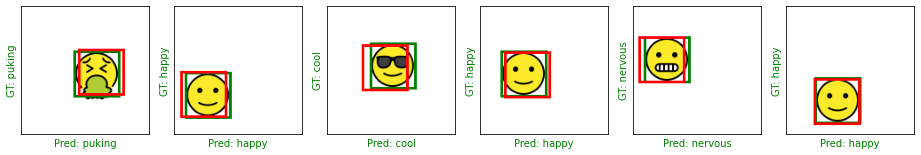

Epoch 31/50
500/500 [==============================] - 11s 22ms/step - loss: 0.0012 - class_out_loss: 2.3357e-04 - box_out_loss: 9.6081e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7760


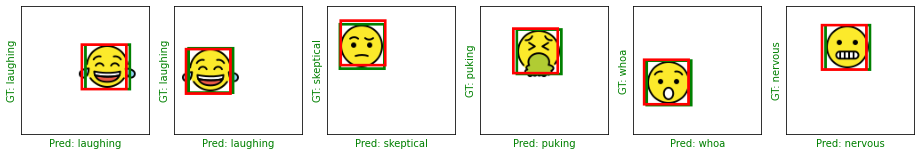

Epoch 32/50
500/500 [==============================] - 10s 20ms/step - loss: 0.0011 - class_out_loss: 1.8357e-04 - box_out_loss: 9.5669e-04 - class_out_accuracy: 1.0000 - box_out_iou: 0.7769


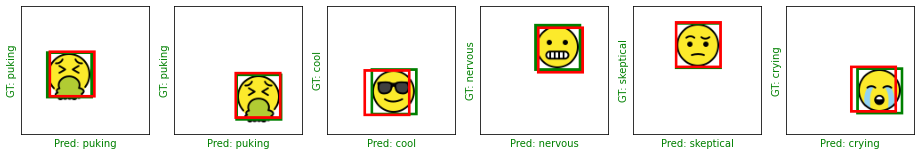

In [42]:
def lr_schedule(epoch, lr):
  if (epoch + 1) % 5 == 0:
    lr *= 0.2              #at the end of every 5 epochs, the learning rate will multiplied by 0.2 for gradient descent 
  return max(lr, 3e-7)     #compare learning rate and 0.0000003, then return the largest number. Because we want the minimum of learning rate is 0.0000003


_ = model.fit(
    data_generator(),
    epochs=50,
    steps_per_epoch=500,
    callbacks=[
               ShowTestImages(),                                                                #Custom callback
               tf.keras.callbacks.EarlyStopping(monitor='box_out_iou', patience=3, mode='max'), #Monitoring the box_out_iou for 3 epochs and if the quantity monitored has stopped increasing, then model.fit will be stop
               tf.keras.callbacks.LearningRateScheduler(lr_schedule)                            #"At the beginning of every epoch, this callback gets the updated learning rate value from schedule(lr_schedule) function"
    ]
)